In [1]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
import seaborn as sns
from sklearn import preprocessing
import scipy as sp

In [2]:
#Import Dataset
df = pd.read_csv('NYPD_Complaint_Data_Current__Year_To_Date.csv')
df.head()

,CMPLNT_NUM,ADDR_PCT_CD,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,HADEVELOPT,HOUSING_PSA,...,TRANSIT_DISTRICT,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,Lat_Lon,New Georeferenced Column
0,244685801,69,BROOKLYN,01/01/2015,00:00:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,<18,BLACK,F,1010541,175595,40.648614,-73.905257,"(40.6486135510607, -73.9052572032302)",POINT (-73.9052572032302 40.6486135510607)
1,242250195,42,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,(null),NaN,...,NaN,UNKNOWN,UNKNOWN,D,1010419,242374,40.831899,-73.905435,"(40.831899, -73.905435)",POINT (-73.905435 40.831899)
2,242385774,123,STATEN ISLAND,03/20/2022,11:52:00,NaN,(null),COMPLETED,(null),NaN,...,NaN,45-64,WHITE,F,926029,138052,40.545405,-74.209485,"(40.545405, -74.209485)",POINT (-74.209485 40.545405)
3,242643555,121,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,(null),NaN,...,NaN,18-24,BLACK,F,942822,166353,40.623188,-74.149238,"(40.6231883776008, -74.1492376947323)",POINT (-74.1492376947323 40.6231883776008)
4,242816732,42,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,(null),NaN,...,NaN,45-64,BLACK,M,1010131,240105,40.825670,-73.906484,"(40.82567, -73.906484)",POINT (-73.906484 40.82567)


## Variables Dictionary :
### Expand the cell below to view the variables dictionary.

> **CMPLNT_NUM** - Randomly generated persistent ID for each complaint
> 
> **ADDR_PCT_CD** - The precinct in which the incident occurred
> 
> **BORO** - The name of the borough in which the incident occurred
> 
> **CMPLNT_FR_DT** - Exact date of occurrence for the reported event (or starting date of occurrence, if CMPLNT_TO_DT exists)
> 
> **CMPLNT_FR_TM** - Exact time of occurrence for the reported event (or starting time of occurrence, if CMPLNT_TO_TM exists)
> 
> **CMPLNT_TO_DT** - Ending date of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CMPLNT_TO_TM** - Ending time of occurrence for the reported event, if exact time of occurrence is unknown
> 
> **CRM_ATPT_CPTD_CD** - Indicator of whether crime was successfully completed or attempted, but failed or was interrupted prematurely
> 
> **HADEVELOPT** - Name of NYCHA housing development of occurrence, if applicable
> 
> **HOUSING_PSA** - Development Level Code
> 
> **JURISDICTION_CODE** - Jurisdiction responsible for incident. Either internal, like Police(0), Transit(1), and Housing(2); or external(3), like Correction, Port Authority, etc.
> 
> **JURIS_DESC** - Description of the jurisdiction code
> 
> **KY_CD** - Three digit offense classification code
> 
> **LAW_CAT_CD** - Level of offense: felony, misdemeanor, violation
> 
> **LOC_OF_OCCUR_DESC** - Specific location of occurrence in or around the premises; inside, opposite of, front of, rear of
> 
> **OFNS_DESC** - Description of offense corresponding with key code
> 
> **PARKS_NM** - Name of NYC park, playground or greenspace of occurrence, if applicable (state parks are not included)
> 
> **PATROL_BORO** - The name of the patrol borough in which the incident occurred
> 
> **PD_CD** - Three digit internal classification code (more granular than Key Code)
> 
> **PD_DESC** - Description of internal classification corresponding with PD code (more granular than Offense Description)
> 
> **PREM_TYP_DESC** - Specific description of premises; grocery store, residence, street, etc.
> 
> **RPT_DT** - Date event was reported to police
> 
> **STATION_NAME** - Transit station name
> 
> **SUSP_AGE_GROUP** - Suspect’s Age Group
> 
> **SUSP_RACE** - Suspect’s Race Description
> 
> **SUSP_SEX** - Suspect’s Sex Description
> 
> **TRANSIT_DISTRICT** - Transit district in which the offense occurred.
> 
> **VIC_AGE_GROUP** - Victim’s Age Group
> 
> **VIC_RACE** - Victim’s Race Description
> 
> **VIC_SEX** - Victim’s Sex Description (D=Business/Organization, E=PSNY/People of the State of New York, F=Female, M=Male)
> 
> **X_COORD_CD** - X-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Y_COORD_CD** - Y-coordinate for New York State Plane Coordinate System, Long Island Zone, NAD 83, units feet (FIPS 3104)
> 
> **Latitude** - Midblock Latitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)
> 
> **Longitude** - Midblock Longitude coordinate for Global Coordinate System, WGS 1984, decimal degrees (EPSG 4326)

In [3]:
print("Observations: ", df.shape[0])

print("Variables: ", df.shape[1])

Observations:  256797
Variables:  36


The dataset contains over 6 million crime reports, with a total of 35 variables each.

After looking at the head of the dataset we were already able to notice some NaN values, therefore we need to examine the missing values further before continuing with the analysis. 

- The `isna()` function will show us the percentage of non-existent values for each variable.

In [4]:
df.replace('(null)',np.nan,inplace= True)


In [5]:
#See the percentege of missing values in each variable
(df.isna().sum()/df.shape[0]*100).sort_values(ascending=False)

HADEVELOPT                  99.682629
PARKS_NM                    99.446645
STATION_NAME                97.777233
TRANSIT_DISTRICT            97.777233
HOUSING_PSA                 93.385826
SUSP_RACE                   19.779047
SUSP_AGE_GROUP              19.779047
SUSP_SEX                    19.779047
LOC_OF_OCCUR_DESC           15.991620
CMPLNT_TO_DT                 7.544481
CMPLNT_TO_TM                 7.523063
BORO_NM                      0.171731
PD_DESC                      0.104752
PD_CD                        0.104752
PREM_TYP_DESC                0.041667
VIC_RACE                     0.028038
OFNS_DESC                    0.002336
PATROL_BORO                  0.001558
X_COORD_CD                   0.000000
VIC_AGE_GROUP                0.000000
Y_COORD_CD                   0.000000
Latitude                     0.000000
Longitude                    0.000000
Lat_Lon                      0.000000
VIC_SEX                      0.000000
CMPLNT_NUM                   0.000000
RPT_DT      

In [6]:
df.fillna(np.nan,inplace = True)


In [7]:
df.drop_duplicates(inplace = True)


### Data Cleaning

#### Dealing with NaN data

Since some of the columns are pretty important for the analysis, I dropped entire rows which miss any crucial value. For that, I used the `dropNA()` function in Pandas.

The columns I didn't want to drop entire rows, I opted to fill them with the 'UNKNOWN' value (These include variables that contain information about the victims of the crime, such as their age group, race, and gender). I used the `fillNA()` function for that.

It is worth mention that some specific variables have a lot of NaN values, and they don't necessarily have any use in this analysis (like PARKS_NM means the park or public place nearby where crime happened, and columns with information about the suspect are also not going to be important, considering they have a lot of missing data) so I would drop those columns entirely with the `drop()` function.

In [8]:
df["SUSP_RACE"] = df["SUSP_RACE"].astype("category")
df["SUSP_RACE"] = df["SUSP_RACE"].cat.remove_categories("UNKNOWN")

<AxesSubplot:ylabel='SUSP_RACE'>

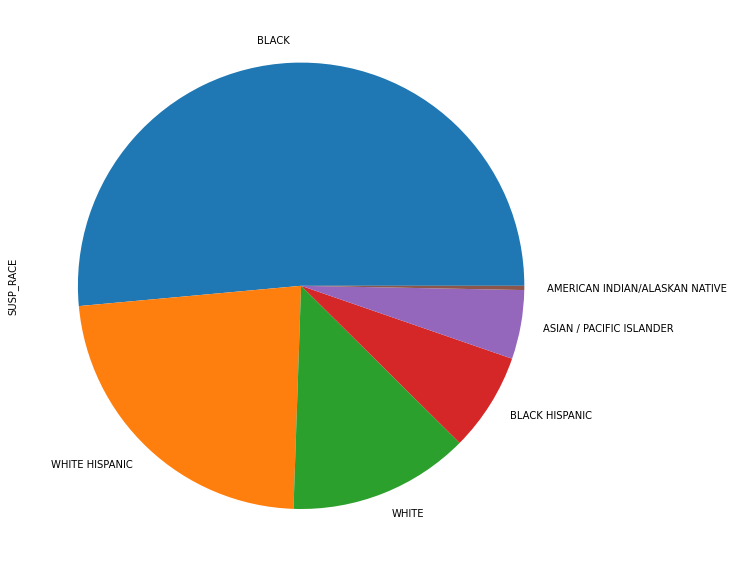

In [9]:
df['SUSP_RACE'].value_counts().plot(kind='pie',figsize=(10,15))

<AxesSubplot:>

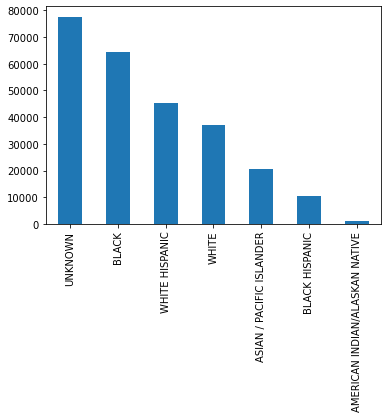

In [10]:
df['VIC_RACE'].value_counts().plot(kind='bar')

In [11]:


#dropping columns that are missing more than 90 percent of values
df.drop(['PARKS_NM','STATION_NAME','TRANSIT_DISTRICT','HADEVELOPT','HOUSING_PSA'],axis='columns', inplace=True)
df.drop(['X_COORD_CD','Y_COORD_CD','Lat_Lon', 'New Georeferenced Column'],axis='columns', inplace=True)

df.drop(['PREM_TYP_DESC', 'JURISDICTION_CODE'], axis='columns', inplace=True)

df.drop(['ADDR_PCT_CD','PD_CD','PD_DESC','JURIS_DESC'], axis='columns', inplace=True)

#replacing all NaN values in 'LOC_OF_OCCUR_DESC' with UNKNOWN
#df.fillna({'LOC_OF_OCCUR_DESC':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_RACE' with UNKNOWN
#df.fillna({'VIC_RACE':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_AGE_GROUP' with UNKNOWN
#df.fillna({'VIC_AGE_GROUP':'UNKNOWN'}, inplace=True)

#replacing all NaN values in 'VIC_SEX' with UNKNOWN
#df.fillna({'VIC_SEX':'UNKNOWN'}, inplace=True)

print('Clean dataset: ')
print("Observations: ", df.shape[0])
print("Variables: ", df.shape[1])

#examing the changes
df.head(5)

Clean dataset: 
Observations:  256797
Variables:  21


,CMPLNT_NUM,BORO_NM,CMPLNT_FR_DT,CMPLNT_FR_TM,CMPLNT_TO_DT,CMPLNT_TO_TM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,...,PATROL_BORO,RPT_DT,SUSP_AGE_GROUP,SUSP_RACE,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,Latitude,Longitude
0,244685801,BROOKLYN,01/01/2015,00:00:00,NaN,NaN,COMPLETED,104,FELONY,INSIDE,...,PATROL BORO BKLYN SOUTH,05/04/2022,18-24,NaN,M,<18,BLACK,F,40.648614,-73.905257
1,242250195,BRONX,03/17/2022,15:23:00,03/17/2022,15:28:00,ATTEMPTED,105,FELONY,INSIDE,...,PATROL BORO BRONX,03/17/2022,UNKNOWN,BLACK,M,UNKNOWN,UNKNOWN,D,40.831899,-73.905435
2,242385774,STATEN ISLAND,03/20/2022,11:52:00,NaN,NaN,COMPLETED,578,VIOLATION,FRONT OF,...,PATROL BORO STATEN ISLAND,03/20/2022,25-44,BLACK,F,45-64,WHITE,F,40.545405,-74.209485
3,242643555,STATEN ISLAND,03/24/2022,15:00:00,03/24/2022,22:00:00,COMPLETED,104,FELONY,INSIDE,...,PATROL BORO STATEN ISLAND,03/25/2022,25-44,BLACK,M,18-24,BLACK,F,40.623188,-74.149238
4,242816732,BRONX,03/29/2022,15:24:00,03/29/2022,15:30:00,COMPLETED,105,FELONY,INSIDE,...,PATROL BORO BRONX,03/29/2022,UNKNOWN,BLACK,M,45-64,BLACK,M,40.825670,-73.906484


In [12]:
#df['SUSP_AGE_GROUP'].replace('UNKNOWN','25-44',inplace=True)
df['SUSP_AGE_GROUP'].value_counts()


UNKNOWN    96968
25-44      63650
45-64      21985
18-24      16092
<18         4914
65+         2378
2022          11
-74            1
-969           1
-1             1
-5962          1
-961           1
-10            1
-941           1
Name: SUSP_AGE_GROUP, dtype: int64

In [13]:
df= df[~df['SUSP_AGE_GROUP'].isin(['2022', '-74','-969','-1','-5962','-961','-10','-941','UNKNOWN'])]
df['SUSP_AGE_GROUP'].value_counts()
df.shape


(159811, 21)

In [14]:
df['SUSP_RACE'].value_counts()


BLACK                             51927
WHITE HISPANIC                    25117
WHITE                             13294
BLACK HISPANIC                     7921
ASIAN / PACIFIC ISLANDER           5757
AMERICAN INDIAN/ALASKAN NATIVE      333
Name: SUSP_RACE, dtype: int64

In [15]:
df['VIC_AGE_GROUP'].value_counts()


25-44      56730
UNKNOWN    46339
45-64      28767
18-24      13821
65+         7329
<18         6818
-5             2
-11            1
-960           1
-40            1
-955           1
-963           1
Name: VIC_AGE_GROUP, dtype: int64

In [16]:
df= df[~df['VIC_AGE_GROUP'].isin(['UNKNOWN','-65', '-5','-934','-40','-4','-964','-955','-959','-963','-11','-960','-970','-971'])]
df['VIC_AGE_GROUP'].value_counts()
df.shape

(113465, 21)

In [17]:
df['VIC_RACE'].value_counts()


BLACK                             41341
WHITE HISPANIC                    28466
WHITE                             21064
ASIAN / PACIFIC ISLANDER          11476
BLACK HISPANIC                     6513
UNKNOWN                            4039
AMERICAN INDIAN/ALASKAN NATIVE      494
Name: VIC_RACE, dtype: int64

In [18]:
#df['VIC_RACE'].replace('UNKNOWN','BLACK',inplace=True)
df= df[~df['VIC_RACE'].isin(['UNKNOWN'])]
df['VIC_RACE'].value_counts()
df.shape

(109426, 21)

In [19]:
df.dropna(inplace=True)
df.reset_index(drop= True, inplace=True)
df.shape

(57858, 21)

In [20]:
#Extracting the day from date given
df['CMPLNT_FR_DT'] = pd.to_datetime(df['CMPLNT_FR_DT'],errors='coerce',format = "%m/%d/%Y" )
df['CMPLNT_TO_DT'] = pd.to_datetime(df['CMPLNT_TO_DT'],errors='coerce',format = "%m/%d/%Y" )
FR_DY = df['CMPLNT_FR_DT'].dt.day_name()
TO_DY = df['CMPLNT_TO_DT'].dt.day_name()


In [21]:
#concatinating th day column
df = pd.concat([df,FR_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_DAY']

In [22]:
#concatinating the dat column
df = pd.concat([df,TO_DY],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_DAY']

In [23]:
fr_hr = pd.to_datetime(df['CMPLNT_FR_TM'], format='%H:%M:%S').dt.hour 
to_hr = pd.to_datetime(df['CMPLNT_TO_TM'], format='%H:%M:%S').dt.hour


In [24]:
df = pd.concat([df,fr_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_FR_PART']


In [25]:
df = pd.concat([df,to_hr],axis=1)
df.columns = [*df.columns[:-1], 'CMPLNT_TO_PART']


In [26]:
#Defining function to get part the hours
def f(x=0):
    if (x > 4) and (x <= 8):
        return 'Early Morning'
    elif (x > 8) and (x <= 12 ):
        return 'Morning'
    elif (x > 12) and (x <= 16):
        return'Noon'
    elif (x > 16) and (x <= 20) :
        return 'Evening'
    elif (x > 20) and (x <= 24):
        return'Night'
    elif (x <= 4):
        return'Late Night'


In [27]:
df['CMPLNT_FR_PART'] = df['CMPLNT_FR_PART'].apply(lambda z: f(z))


In [28]:
df['CMPLNT_TO_PART'] = df['CMPLNT_TO_PART'].apply(lambda z: f(z))


In [29]:
df.drop(columns=['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'],inplace= True)

In [30]:
df.drop(columns=['Latitude','Longitude'],inplace= True)

In [31]:
#df.drop(columns=['CMPLNT_FR_DT','CMPLNT_FR_TM','CMPLNT_TO_DT','CMPLNT_TO_TM'],inplace= True)

In [32]:
df.shape

(57858, 19)

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CMPLNT_NUM         57858 non-null  object  
 1   BORO_NM            57858 non-null  object  
 2   CRM_ATPT_CPTD_CD   57858 non-null  object  
 3   KY_CD              57858 non-null  int64   
 4   LAW_CAT_CD         57858 non-null  object  
 5   LOC_OF_OCCUR_DESC  57858 non-null  object  
 6   OFNS_DESC          57858 non-null  object  
 7   PATROL_BORO        57858 non-null  object  
 8   RPT_DT             57858 non-null  object  
 9   SUSP_AGE_GROUP     57858 non-null  object  
 10  SUSP_RACE          57858 non-null  category
 11  SUSP_SEX           57858 non-null  object  
 12  VIC_AGE_GROUP      57858 non-null  object  
 13  VIC_RACE           57858 non-null  object  
 14  VIC_SEX            57858 non-null  object  
 15  CMPLNT_FR_DAY      57858 non-null  object  
 16  CMPL

In [34]:
df["BORO_NM"] = df["BORO_NM"].astype("category")

In [35]:
df["PATROL_BORO"] = df["PATROL_BORO"].astype("category")

In [36]:
df_clean = df.replace({'HARRASSMENT 2': 'HARASSMENT', 
                'ESCAPE 3': 'ESCAPE',
                'ASSAULT 3 & RELATED OFFENSES': 'ASSAULT & RELATED OFFENSES',
                'CRIMINAL MISCHIEF & RELATED OF': 'CRIMINAL MISCHIEF',
                'OFF. AGNST PUB ORD SENSBLTY &': 'OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION',
                'OTHER STATE LAWS (NON PENAL LA': 'OTHER STATE LAWS (NON PENAL LAW)',
                'ENDAN WELFARE INCOMP': 'ENDANGERING WELFARE OF INCOMPETENT',
                'AGRICULTURE & MRKTS LAW-UNCLASSIFIED': 'AGRICULTURE & MARKETS LAW',
                'DISRUPTION OF A RELIGIOUS SERV': 'DISRUPTION OF A RELIGIOUS SERVICE',
                'LOITERING/GAMBLING (CARDS, DIC': 'GAMBLING',
                'OFFENSES AGAINST MARRIAGE UNCL': 'OFFENSES AGAINST MARRIAGE',
                'HOMICIDE-NEGLIGENT,UNCLASSIFIE': 'HOMICIDE-NEGLIGENT',
                                      'E': 'UNKNOWN',
                                      'D': 'BUSINESS/ORGANIZATION',
                                      'F': 'FEMALE',
                                      'M': 'MALE'}).copy()

## EDA :

In [37]:
#types of crimes (top 10)
df_clean.OFNS_DESC.value_counts().iloc[:10]

HARASSMENT                                      17302
ASSAULT & RELATED OFFENSES                      13134
FELONY ASSAULT                                   5875
OFFENSES AGAINST PUBLIC ORDER/ADMINISTRATION     4020
MISCELLANEOUS PENAL LAW                          3838
CRIMINAL MISCHIEF                                3069
ROBBERY                                          1944
OFFENSES AGAINST PUBLIC ADMINI                   1694
PETIT LARCENY                                    1457
SEX CRIMES                                       1426
Name: OFNS_DESC, dtype: int64

<AxesSubplot:title={'center':'Types of Crimes'}>

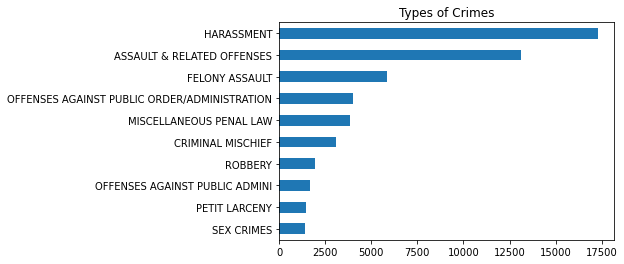

In [38]:
df_clean.OFNS_DESC.value_counts().iloc[:10].sort_values().plot(kind="barh", title = "Types of Crimes")

There are three levels of crime in New York State: Violation, Misdemeanor and Felony.

From the graph below, I can tell that Misdemeanor, an offense of which a sentence in excess of 15 days but not greater than one year may be imposed, is the most popular level of crime. The second popular one is Felony, the most serious of offenses, and the third one is Violation, a lesser offense for which a sentence only be no more than 15 days.

array([<AxesSubplot:ylabel='LAW_CAT_CD'>], dtype=object)

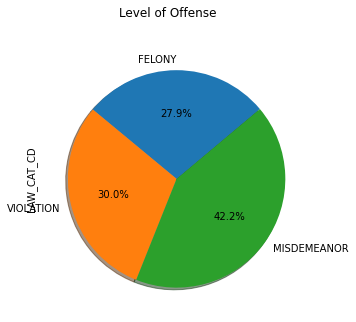

In [39]:
df_clean['LAW_CAT_CD'].value_counts().sort_values().plot(kind='pie', subplots=True, shadow = True,startangle=40,
figsize=(10,5), autopct='%1.1f%%', title = 'Level of Offense')

### 2. Distribution of crimes over the years, months and days

<AxesSubplot:title={'center':'Total Crime Events by Year'}>

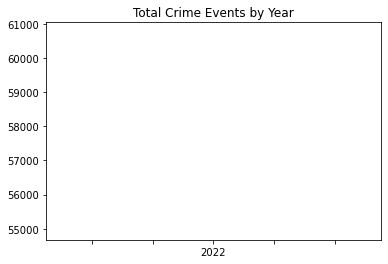

In [40]:
df_clean['year'] = df_clean['RPT_DT'].str.findall(r'(\d{4})').apply(lambda x: x[0])
df_clean['year'].value_counts().plot(kind="line", title = "Total Crime Events by Year")

<AxesSubplot:title={'center':'Total Crime Events by Month'}, xlabel='month'>

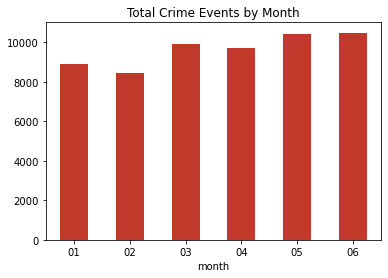

In [41]:
#reports by month
df_clean['month'] = df_clean['RPT_DT'].str.findall('(\d{2})').apply(lambda x: x[0])
df_clean.groupby('month').size().plot(kind = 'bar', title ='Total Crime Events by Month', color = '#C0392B',rot=0)

### 4. Analyzing a Specific Crime

I want to specifically analyze sex related crimes in NYC. For that, I put the part of the dataframe that contains the crime description 'sex crimes' and 'rape' into another dataframe and called it “sex_crimes.”

In [42]:
sex_crimes = df_clean[df.OFNS_DESC.str.contains('SEX CRIMES|RAPE')]
sex_crimes.head()

,CMPLNT_NUM,BORO_NM,CRM_ATPT_CPTD_CD,KY_CD,LAW_CAT_CD,LOC_OF_OCCUR_DESC,OFNS_DESC,PATROL_BORO,RPT_DT,SUSP_AGE_GROUP,...,SUSP_SEX,VIC_AGE_GROUP,VIC_RACE,VIC_SEX,CMPLNT_FR_DAY,CMPLNT_TO_DAY,CMPLNT_FR_PART,CMPLNT_TO_PART,year,month
0,242643555,STATEN ISLAND,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO STATEN ISLAND,03/25/2022,25-44,...,MALE,18-24,BLACK,FEMALE,Thursday,Thursday,Noon,Night,2022,03
3,245415071,BRONX,COMPLETED,116,FELONY,INSIDE,SEX CRIMES,PATROL BORO BRONX,05/20/2022,25-44,...,MALE,<18,WHITE HISPANIC,FEMALE,Tuesday,Saturday,Late Night,Late Night,2022,05
9,242064502,MANHATTAN,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO MAN SOUTH,03/14/2022,25-44,...,MALE,25-44,ASIAN / PACIFIC ISLANDER,FEMALE,Saturday,Saturday,Morning,Morning,2022,03
10,240947098,BRONX,COMPLETED,104,FELONY,INSIDE,RAPE,PATROL BORO BRONX,02/19/2022,25-44,...,FEMALE,<18,WHITE HISPANIC,FEMALE,Sunday,Sunday,Evening,Evening,2022,02
11,241709140,QUEENS,COMPLETED,233,MISDEMEANOR,INSIDE,SEX CRIMES,PATROL BORO QUEENS SOUTH,03/07/2022,<18,...,MALE,<18,BLACK,FEMALE,Wednesday,Friday,Noon,Noon,2022,03


#### Analyzing Time

We may be interested in the distribution of values across the years, so I'm going to group the data by year and plot the results.

1826.0


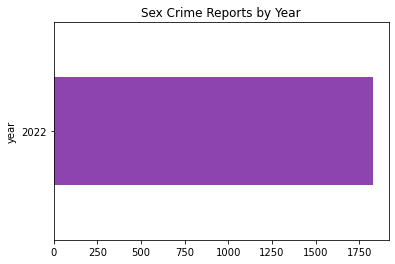

In [43]:
#plot graph
sex_crimes.groupby('year').size().plot(kind = 'barh', color = '#8E44AD', title = 'Sex Crime Reports by Year')

#average sex crimes per year
mean = sex_crimes['year'].value_counts().mean()
print(round(mean,2))

- Based on the bar graph that I computed, sex crimes happened the most during the last 3 years compared to previous years.

- On average, there are 7443 victims of rape and sexual assault each year in New York City.

Let’s also look at how the number of the reports changes within a day.

WHITE HISPANIC                    34.611172
BLACK                             33.515882
WHITE                             14.622125
ASIAN / PACIFIC ISLANDER          10.569551
BLACK HISPANIC                     6.243154
AMERICAN INDIAN/ALASKAN NATIVE     0.438116
Name: VIC_RACE, dtype: float64


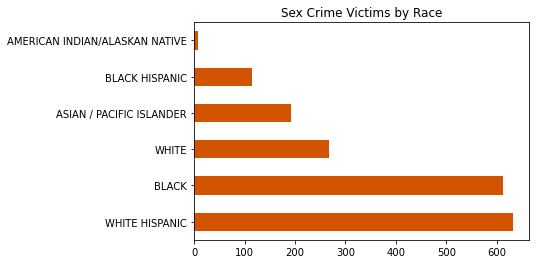

In [44]:
# Sex victims by Race :
sex_crimes['VIC_RACE'].value_counts().iloc[:7].plot(kind="barh", color = '#D35400', title = 'Sex Crime Victims by Race')

#victims by race percentage
vic_race_per = sex_crimes['VIC_RACE'].value_counts().iloc[:7] / sex_crimes['VIC_RACE'].shape[0] *100
print(vic_race_per)

In [45]:
df.KY_CD.nunique()

47

In [46]:
df.OFNS_DESC.nunique()

44

In [47]:
df.drop(columns=['KY_CD','OFNS_DESC','RPT_DT'],inplace= True)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   CMPLNT_NUM         57858 non-null  object  
 1   BORO_NM            57858 non-null  category
 2   CRM_ATPT_CPTD_CD   57858 non-null  object  
 3   LAW_CAT_CD         57858 non-null  object  
 4   LOC_OF_OCCUR_DESC  57858 non-null  object  
 5   PATROL_BORO        57858 non-null  category
 6   SUSP_AGE_GROUP     57858 non-null  object  
 7   SUSP_RACE          57858 non-null  category
 8   SUSP_SEX           57858 non-null  object  
 9   VIC_AGE_GROUP      57858 non-null  object  
 10  VIC_RACE           57858 non-null  object  
 11  VIC_SEX            57858 non-null  object  
 12  CMPLNT_FR_DAY      57858 non-null  object  
 13  CMPLNT_TO_DAY      57858 non-null  object  
 14  CMPLNT_FR_PART     57858 non-null  object  
 15  CMPLNT_TO_PART     57858 non-null  object  
dtypes: c

In [49]:
df1= pd.get_dummies(df,columns=['BORO_NM','CRM_ATPT_CPTD_CD','LAW_CAT_CD','LOC_OF_OCCUR_DESC','PATROL_BORO','SUSP_AGE_GROUP','SUSP_RACE','SUSP_SEX','VIC_AGE_GROUP','VIC_RACE','VIC_SEX','CMPLNT_FR_DAY','CMPLNT_TO_DAY','CMPLNT_FR_PART','CMPLNT_TO_PART'])
df1

,CMPLNT_NUM,BORO_NM_BRONX,BORO_NM_BROOKLYN,BORO_NM_MANHATTAN,BORO_NM_QUEENS,BORO_NM_STATEN ISLAND,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,...,CMPLNT_FR_PART_Late Night,CMPLNT_FR_PART_Morning,CMPLNT_FR_PART_Night,CMPLNT_FR_PART_Noon,CMPLNT_TO_PART_Early Morning,CMPLNT_TO_PART_Evening,CMPLNT_TO_PART_Late Night,CMPLNT_TO_PART_Morning,CMPLNT_TO_PART_Night,CMPLNT_TO_PART_Noon
0,242643555,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,1,0
1,238863220,0,0,1,0,0,0,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,238498378,0,0,0,1,0,0,1,1,0,...,0,0,0,0,1,0,0,0,0,0
3,245415071,1,0,0,0,0,0,1,1,0,...,1,0,0,0,0,0,1,0,0,0
4,240311796,1,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57853,247398897,0,1,0,0,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0
57854,247353200,0,1,0,0,0,0,1,0,1,...,0,0,0,0,1,0,0,0,0,0
57855,247415547,0,1,0,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
57856,247392173,0,0,0,1,0,0,1,0,1,...,0,0,0,0,0,1,0,0,0,0


In [50]:
# Show descriptive statistics
df1.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
BORO_NM_BRONX,57858.0,0.219831,0.414136,0.0,0.0,0.0,0.0,1.0
BORO_NM_BROOKLYN,57858.0,0.301877,0.459076,0.0,0.0,0.0,1.0,1.0
BORO_NM_MANHATTAN,57858.0,0.201597,0.401196,0.0,0.0,0.0,0.0,1.0
BORO_NM_QUEENS,57858.0,0.228525,0.419886,0.0,0.0,0.0,0.0,1.0
BORO_NM_STATEN ISLAND,57858.0,0.048170,0.214126,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,57858.0,0.221905,0.415531,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Late Night,57858.0,0.146911,0.354021,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Morning,57858.0,0.178143,0.382636,0.0,0.0,0.0,0.0,1.0
CMPLNT_TO_PART_Night,57858.0,0.148882,0.355975,0.0,0.0,0.0,0.0,1.0


In [51]:
df1.corr(method='pearson')

,BORO_NM_BRONX,BORO_NM_BROOKLYN,BORO_NM_MANHATTAN,BORO_NM_QUEENS,BORO_NM_STATEN ISLAND,CRM_ATPT_CPTD_CD_ATTEMPTED,CRM_ATPT_CPTD_CD_COMPLETED,LAW_CAT_CD_FELONY,LAW_CAT_CD_MISDEMEANOR,LAW_CAT_CD_VIOLATION,...,CMPLNT_FR_PART_Late Night,CMPLNT_FR_PART_Morning,CMPLNT_FR_PART_Night,CMPLNT_FR_PART_Noon,CMPLNT_TO_PART_Early Morning,CMPLNT_TO_PART_Evening,CMPLNT_TO_PART_Late Night,CMPLNT_TO_PART_Morning,CMPLNT_TO_PART_Night,CMPLNT_TO_PART_Noon
BORO_NM_BRONX,1.000000,-0.349060,-0.266736,-0.288906,-0.119415,0.003758,-0.003758,-0.019793,0.032537,-0.015701,...,-0.000397,-0.008195,-0.007648,0.001192,0.003381,0.010605,0.003588,-0.005432,-0.009218,-0.003253
BORO_NM_BROOKLYN,-0.349060,1.000000,-0.330430,-0.357894,-0.147930,-0.006172,0.006172,0.008818,-0.022155,0.015252,...,-0.014787,0.005515,0.005106,0.000708,0.008399,-0.002881,-0.015309,0.001530,0.001971,0.007016
BORO_NM_MANHATTAN,-0.266736,-0.330430,1.000000,-0.273487,-0.113042,0.026486,-0.026486,-0.002360,0.006878,-0.005105,...,0.016913,0.003799,-0.013868,0.008363,-0.003575,-0.009881,0.016967,0.006996,-0.015437,0.004877
BORO_NM_QUEENS,-0.288906,-0.357894,-0.273487,1.000000,-0.122437,-0.015875,0.015875,0.020483,-0.010261,-0.008988,...,0.007237,-0.007872,0.017418,-0.012079,-0.010128,0.001879,0.004481,-0.006821,0.024224,-0.013281
BORO_NM_STATEN ISLAND,-0.119415,-0.147930,-0.113042,-0.122437,1.000000,-0.012531,0.012531,-0.016369,-0.008197,0.024859,...,-0.013411,0.012344,-0.004327,0.004194,0.002013,0.000495,-0.014693,0.007492,-0.004973,0.008153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CMPLNT_TO_PART_Evening,0.010605,-0.002881,-0.009881,0.001879,0.000495,-0.002143,0.002143,-0.013368,0.001718,0.011234,...,-0.214519,-0.221179,-0.208176,-0.163757,-0.175129,1.000000,-0.221615,-0.248630,-0.223354,-0.272894
CMPLNT_TO_PART_Late Night,0.003588,-0.015309,0.016967,0.004481,-0.014693,0.012057,-0.012057,0.052096,0.015912,-0.068149,...,0.852729,-0.187023,-0.076127,-0.203650,-0.136088,-0.221615,1.000000,-0.193204,-0.173563,-0.212059
CMPLNT_TO_PART_Morning,-0.005432,0.001530,0.006996,-0.006821,0.007492,-0.009333,0.009333,-0.031357,-0.013078,0.044793,...,-0.170069,0.826518,-0.174303,-0.221522,-0.152678,-0.248630,-0.193204,1.000000,-0.194721,-0.237910
CMPLNT_TO_PART_Night,-0.009218,0.001971,-0.015437,0.024224,-0.004973,0.002682,-0.002682,0.015667,0.006871,-0.022743,...,-0.141106,-0.180829,0.830897,-0.196793,-0.137156,-0.223354,-0.173563,-0.194721,1.000000,-0.213723


There are no numerical variables available to perform Data Normalization

## Correlation Heatmap

<AxesSubplot:>

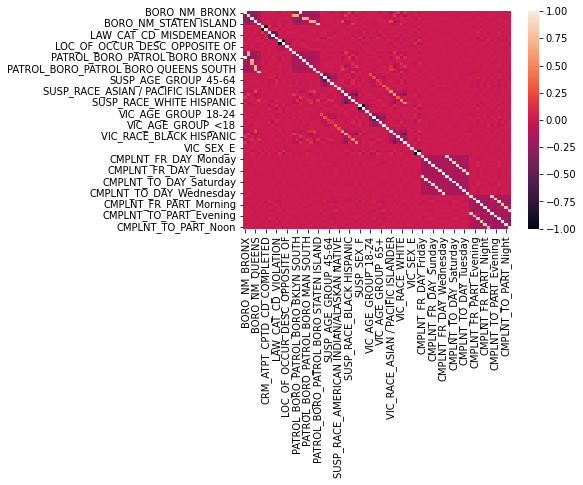

In [52]:
sns.heatmap(df1.corr())

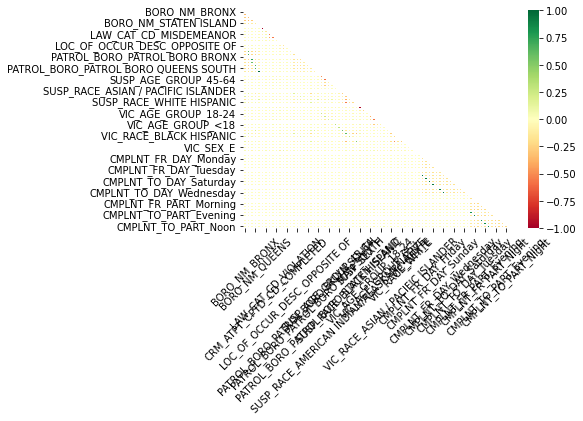

In [53]:
mask = np.zeros_like(df1.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(df1.corr(), cmap='RdYlGn', vmax=1.0, vmin=-1.0 , mask = mask, linewidths=2)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.savefig('correlation_heatmap.png',dpi=500,bbox_inches='tight')

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57858 entries, 0 to 57857
Data columns (total 78 columns):
 #   Column                                    Non-Null Count  Dtype 
---  ------                                    --------------  ----- 
 0   CMPLNT_NUM                                57858 non-null  object
 1   BORO_NM_BRONX                             57858 non-null  uint8 
 2   BORO_NM_BROOKLYN                          57858 non-null  uint8 
 3   BORO_NM_MANHATTAN                         57858 non-null  uint8 
 4   BORO_NM_QUEENS                            57858 non-null  uint8 
 5   BORO_NM_STATEN ISLAND                     57858 non-null  uint8 
 6   CRM_ATPT_CPTD_CD_ATTEMPTED                57858 non-null  uint8 
 7   CRM_ATPT_CPTD_CD_COMPLETED                57858 non-null  uint8 
 8   LAW_CAT_CD_FELONY                         57858 non-null  uint8 
 9   LAW_CAT_CD_MISDEMEANOR                    57858 non-null  uint8 
 10  LAW_CAT_CD_VIOLATION                      5785

# PCA

In [55]:
data_norm = scale(df1.loc[:,'BORO_NM_BRONX':'CMPLNT_TO_PART_Noon'])

In [56]:
pd.DataFrame(data_norm).describe().transpose()

,count,mean,std,min,25%,50%,75%,max
0,57858.0,1.071040e-16,1.000009,-0.530824,-0.530824,-0.530824,-0.530824,1.883864
1,57858.0,1.340657e-15,1.000009,-0.657581,-0.657581,-0.657581,1.520726,1.520726
2,57858.0,3.878957e-15,1.000009,-0.502494,-0.502494,-0.502494,-0.502494,1.990073
3,57858.0,-8.430695e-15,1.000009,-0.544259,-0.544259,-0.544259,-0.544259,1.837359
4,57858.0,-1.855122e-15,1.000009,-0.224961,-0.224961,-0.224961,-0.224961,4.445217
...,...,...,...,...,...,...,...,...
72,57858.0,-1.533502e-15,1.000009,-0.534032,-0.534032,-0.534032,-0.534032,1.872545
73,57858.0,-2.813323e-15,1.000009,-0.414983,-0.414983,-0.414983,-0.414983,2.409735
74,57858.0,1.502353e-15,1.000009,-0.465571,-0.465571,-0.465571,-0.465571,2.147898
75,57858.0,1.164761e-15,1.000009,-0.418240,-0.418240,-0.418240,-0.418240,2.390971


In [57]:
pd.DataFrame(data_norm).corr()

,0,1,2,3,4,5,6,7,8,9,...,67,68,69,70,71,72,73,74,75,76
0,1.000000,-0.349060,-0.266736,-0.288906,-0.119415,0.003758,-0.003758,-0.019793,0.032537,-0.015701,...,-0.000397,-0.008195,-0.007648,0.001192,0.003381,0.010605,0.003588,-0.005432,-0.009218,-0.003253
1,-0.349060,1.000000,-0.330430,-0.357894,-0.147930,-0.006172,0.006172,0.008818,-0.022155,0.015252,...,-0.014787,0.005515,0.005106,0.000708,0.008399,-0.002881,-0.015309,0.001530,0.001971,0.007016
2,-0.266736,-0.330430,1.000000,-0.273487,-0.113042,0.026486,-0.026486,-0.002360,0.006878,-0.005105,...,0.016913,0.003799,-0.013868,0.008363,-0.003575,-0.009881,0.016967,0.006996,-0.015437,0.004877
3,-0.288906,-0.357894,-0.273487,1.000000,-0.122437,-0.015875,0.015875,0.020483,-0.010261,-0.008988,...,0.007237,-0.007872,0.017418,-0.012079,-0.010128,0.001879,0.004481,-0.006821,0.024224,-0.013281
4,-0.119415,-0.147930,-0.113042,-0.122437,1.000000,-0.012531,0.012531,-0.016369,-0.008197,0.024859,...,-0.013411,0.012344,-0.004327,0.004194,0.002013,0.000495,-0.014693,0.007492,-0.004973,0.008153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,0.010605,-0.002881,-0.009881,0.001879,0.000495,-0.002143,0.002143,-0.013368,0.001718,0.011234,...,-0.214519,-0.221179,-0.208176,-0.163757,-0.175129,1.000000,-0.221615,-0.248630,-0.223354,-0.272894
73,0.003588,-0.015309,0.016967,0.004481,-0.014693,0.012057,-0.012057,0.052096,0.015912,-0.068149,...,0.852729,-0.187023,-0.076127,-0.203650,-0.136088,-0.221615,1.000000,-0.193204,-0.173563,-0.212059
74,-0.005432,0.001530,0.006996,-0.006821,0.007492,-0.009333,0.009333,-0.031357,-0.013078,0.044793,...,-0.170069,0.826518,-0.174303,-0.221522,-0.152678,-0.248630,-0.193204,1.000000,-0.194721,-0.237910
75,-0.009218,0.001971,-0.015437,0.024224,-0.004973,0.002682,-0.002682,0.015667,0.006871,-0.022743,...,-0.141106,-0.180829,0.830897,-0.196793,-0.137156,-0.223354,-0.173563,-0.194721,1.000000,-0.213723


Normalization does not change the correlation between variables.

 run the component analysis with 76 components

In [58]:
# Select the number of components
pca1 = PCA(n_components=76)

# Fit the PCA model
pca1.fit(data_norm)

PCA(n_components=76)

In [59]:
#The amount of variance that each PC explains
var = pca1.explained_variance_ratio_

print(var)

[4.07976708e-02 3.86414996e-02 3.43033405e-02 3.30044527e-02
 3.12082516e-02 3.07543828e-02 2.99962927e-02 2.94798855e-02
 2.91661640e-02 2.90587049e-02 2.88500811e-02 2.87620387e-02
 2.85264057e-02 2.83245778e-02 2.75438953e-02 2.68692224e-02
 2.67013585e-02 2.60103421e-02 2.55959330e-02 2.48991003e-02
 2.35589556e-02 2.14974251e-02 2.01506463e-02 1.93438588e-02
 1.84401494e-02 1.77808640e-02 1.70498376e-02 1.67082070e-02
 1.65549514e-02 1.57304179e-02 1.50693383e-02 1.46295478e-02
 1.35418154e-02 1.33099793e-02 1.32094703e-02 1.31053520e-02
 1.29877892e-02 1.28482962e-02 1.27469934e-02 1.25275741e-02
 1.05105250e-02 1.04321930e-02 9.36882932e-03 9.11021985e-03
 8.10746283e-03 7.49169104e-03 5.79640792e-03 3.46524216e-03
 2.99114269e-03 2.76549733e-03 1.85623704e-03 1.55751611e-03
 1.50757969e-03 1.49941313e-03 1.24714882e-03 1.21833003e-03
 9.19836612e-04 8.28167210e-04 3.55231707e-05 2.91429921e-06
 2.60579897e-06 4.48174278e-07 1.61980529e-31 1.89002053e-32
 1.29795113e-32 7.042448

In [60]:
#Cumulative Variance explains
var1 = np.cumsum(np.round(pca1.explained_variance_ratio_, decimals=4)*100)

print(var1)

[ 4.08  7.94 11.37 14.67 17.79 20.87 23.87 26.82 29.74 32.65 35.54 38.42
 41.27 44.1  46.85 49.54 52.21 54.81 57.37 59.86 62.22 64.37 66.39 68.32
 70.16 71.94 73.64 75.31 76.97 78.54 80.05 81.51 82.86 84.19 85.51 86.82
 88.12 89.4  90.67 91.92 92.97 94.01 94.95 95.86 96.67 97.42 98.   98.35
 98.65 98.93 99.12 99.28 99.43 99.58 99.7  99.82 99.91 99.99 99.99 99.99
 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99 99.99
 99.99 99.99 99.99 99.99]


Draw a scree plot to show the cumulative variance explained along the number of principal components.

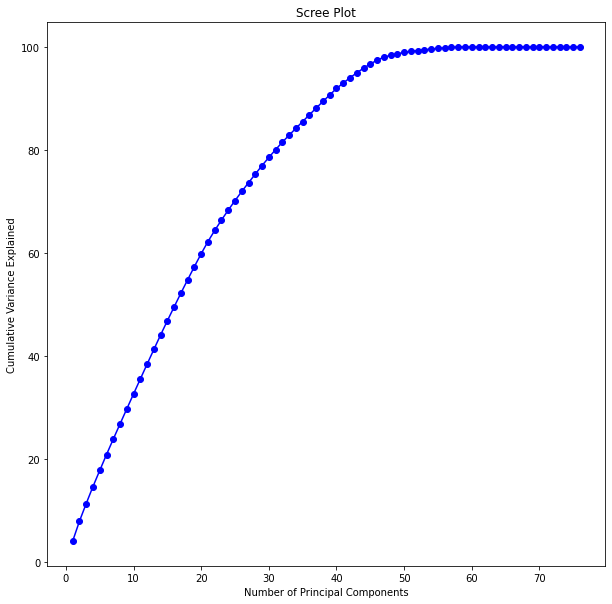

In [61]:
var1 = pd.DataFrame(var1, index=np.arange(1,77))
plt.figure(figsize = (10,10))
plt.plot(var1,'-o',color='blue')
plt.title('Scree Plot')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.savefig('scree_plot.png',dpi=100,bbox_inches='tight')

From the above plot, we can see that if we choose a 39-component solution, the explained variance would be > 90%. That is to say, 39 orthogonal (uncorrelated) components will be able to keep more than 90% variance of the 76 variables in the original dataset. This would be a good solution. Now, let's do the PCA with 39 components.

In [62]:
# Select the number of components
pca39 = PCA(n_components=39)
pca39.fit(data_norm)
data_pca39 = pca39.transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca39 = pd.DataFrame(data_pca39)
data_pca39.columns = ["PC"+str(i) for i in range(1,40)]

# Show the head of the DataFrame
data_pca39.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
0,-0.855719,-0.823538,1.004756,0.140027,-1.719821,0.640996,2.245284,-1.059683,-0.695181,1.270155,...,0.523282,0.298545,-0.167636,-0.518055,0.269245,-0.058649,0.600137,-0.226889,0.625146,-0.117343
1,0.428194,-0.042137,1.010450,1.714510,0.285838,0.090095,-2.406478,-1.784871,0.033946,3.577373,...,-1.008749,1.113437,-0.685434,-0.263199,0.351997,0.295158,-0.120245,0.274741,-0.243945,-0.813237
2,-0.350695,0.266403,-3.586554,-0.261243,-0.811858,-1.753287,-1.263316,-1.264387,1.907338,-1.241241,...,0.703275,0.074899,-0.546281,0.995082,-1.079193,-0.368446,-0.500719,-0.094459,0.200651,-0.010174
3,1.089796,4.084443,-1.061351,0.930730,0.003558,-0.513908,1.165775,-0.564454,1.226321,-1.408939,...,0.570487,-0.072328,0.230937,0.069113,-0.258033,-0.284151,0.151185,0.147095,-0.056067,-0.465100
4,-1.481029,2.953895,-1.714135,0.137582,-0.090840,0.533663,0.255230,1.346635,-0.171501,1.559683,...,0.876360,-0.084030,0.083774,-0.423083,0.416508,-0.007715,0.091071,-0.096606,-0.405229,0.288742
5,2.940541,1.150344,-1.919296,-1.210172,-0.673630,0.292644,-0.688198,-1.790150,0.047278,3.769229,...,-0.577265,0.149666,0.320528,-0.956739,0.773043,0.153459,0.771025,-0.170375,0.566571,-0.240435
6,-0.857775,-0.691617,-0.460079,0.007664,-1.451191,1.266789,0.155391,-1.833351,0.532351,3.516513,...,-0.348561,-1.582637,1.151114,0.273545,-0.201007,0.387186,-0.272284,0.534327,-0.386312,-1.030567
7,-1.321240,-0.436216,-3.378256,2.699151,-0.331198,-0.358739,1.310038,-1.854175,1.859911,-1.787457,...,0.368370,-1.523964,1.397479,-0.180433,0.339280,-0.030427,0.439409,0.543833,0.025237,-1.402114
8,-1.707666,-1.610364,-0.817710,-0.221519,1.200815,2.702044,0.924183,1.021135,-1.468087,-0.509632,...,0.146738,3.141030,0.979421,-0.322995,-0.561067,-0.230228,0.782849,-0.539801,1.742662,-1.125424
9,1.838577,-0.731944,-1.367439,1.869906,-1.826739,-2.280352,-2.507424,-1.344791,1.197894,-1.364479,...,1.242233,-1.809258,0.731495,-0.203041,-0.284648,0.178487,0.049560,-0.312500,-0.527051,0.948754


In [63]:
data_pca39.corr()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39
PC1,1.000000e+00,-7.028810e-11,-8.281616e-11,-9.126001e-11,-3.296385e-10,-4.283579e-11,-9.322175e-11,-1.535730e-11,-4.262817e-11,4.912809e-10,...,-4.831799e-10,-3.800688e-09,-4.430750e-09,4.380336e-09,5.613465e-10,5.039851e-09,4.618837e-09,-7.402818e-09,1.843731e-08,5.638755e-09
PC2,-7.028810e-11,1.000000e+00,2.266095e-10,2.155524e-10,5.254009e-10,2.438084e-10,3.369905e-10,-1.488726e-10,1.417547e-11,-9.569712e-10,...,3.264654e-09,7.075404e-09,9.261534e-09,-7.091154e-09,-3.558295e-09,-9.139325e-09,-1.302519e-09,1.594198e-08,-3.599000e-08,-5.964958e-09
PC3,-8.281616e-11,2.266095e-10,1.000000e+00,2.565244e-10,6.226664e-10,2.926575e-10,4.052339e-10,-1.807546e-10,1.548512e-11,-1.137887e-09,...,3.929222e-09,8.426244e-09,1.100237e-08,-8.440018e-09,-4.297025e-09,-1.090872e-08,-1.428202e-09,1.901652e-08,-4.289815e-08,-6.981702e-09
PC4,-9.126001e-11,2.155524e-10,2.565244e-10,1.000000e+00,6.460950e-10,2.593656e-10,3.703248e-10,-1.421006e-10,2.965736e-11,-1.137231e-09,...,3.445273e-09,8.464083e-09,1.088367e-08,-8.690782e-09,-3.743570e-09,-1.095112e-08,-3.034684e-09,1.866529e-08,-4.272795e-08,-8.059447e-09
PC5,-3.296385e-10,5.254009e-10,6.226664e-10,6.460950e-10,1.000000e+00,4.620989e-10,7.943968e-10,-1.036897e-10,2.087433e-10,-3.251428e-09,...,5.742290e-09,2.484124e-08,3.003885e-08,-2.737960e-08,-6.591195e-09,-3.281796e-08,-2.175997e-08,5.065019e-08,-1.222354e-07,-3.161035e-08
PC6,-4.283579e-11,2.438084e-10,2.926575e-10,2.593656e-10,4.620989e-10,1.000000e+00,4.819556e-10,-2.979587e-10,-4.318457e-11,-1.016566e-09,...,5.400731e-09,7.229878e-09,1.030937e-08,-6.384167e-09,-5.698462e-09,-9.010963e-09,4.641783e-09,1.822148e-08,-3.826915e-08,-2.355681e-09
PC7,-9.322175e-11,3.369905e-10,4.052339e-10,3.703248e-10,7.943968e-10,4.819556e-10,1.000000e+00,-3.375358e-10,-1.371138e-11,-1.560532e-09,...,6.573350e-09,1.140504e-08,1.538425e-08,-1.085565e-08,-7.143091e-09,-1.462616e-08,1.881215e-09,2.689846e-08,-5.893164e-08,-7.043066e-09
PC8,-1.535730e-11,-1.488726e-10,-1.807546e-10,-1.421006e-10,-1.036897e-10,-2.979587e-10,-3.375358e-10,1.000000e+00,7.281645e-11,4.369273e-10,...,-4.174734e-09,-2.866700e-09,-4.970980e-09,1.572422e-09,4.541804e-09,3.487221e-09,-8.498494e-09,-9.080326e-09,1.660916e-08,-3.195454e-09
PC9,-4.262817e-11,1.417547e-11,1.548512e-11,2.965736e-11,2.087433e-10,-4.318457e-11,-1.371138e-11,7.281645e-11,1.000000e+00,-2.395362e-10,...,-7.428666e-10,2.017705e-09,1.938450e-09,-2.675726e-09,6.089166e-10,-2.890141e-09,-5.064446e-09,2.958522e-09,-9.001752e-09,-4.652874e-09
PC10,4.912809e-10,-9.569712e-10,-1.137887e-09,-1.137231e-09,-3.251428e-09,-1.016566e-09,-1.560532e-09,4.369273e-10,-2.395362e-10,1.000000e+00,...,-1.322619e-08,-4.099722e-08,-5.117624e-08,4.356273e-08,1.458242e-08,5.350401e-08,2.502618e-08,-8.727125e-08,2.044582e-07,4.541159e-08


From the above correlation table, we can find that the pairwise correlations between two components are close to zeros. This means that all these components are orthogonal (not correlated). There is no multicollinearity among principal components.

PCA applies a linear transformation to transform the data to a new space with fewer dimensions. Let's show the loadings for the 1st principal component and explore how the 1st principal component is calculated from the normalized data.

In [64]:
# Show the loadings for the 1st components
pca39.components_[[0]]

array([[-7.10152373e-02, -3.28407566e-01,  8.26866235e-02,
         3.23105689e-01,  5.29260677e-02,  2.18112740e-02,
        -2.18112740e-02,  2.48782423e-02, -3.89447821e-03,
        -2.01541038e-02,  6.55188257e-02, -7.12881118e-02,
         1.32177107e-02,  1.99679381e-02, -2.46228119e-01,
        -1.76729888e-01, -7.10265632e-02,  3.22703363e-02,
         8.33012411e-02,  2.88531231e-01,  1.38075446e-01,
         5.29269346e-02, -2.58112788e-02,  5.05880782e-04,
         2.87421568e-02,  1.88953785e-02, -2.70650288e-02,
         2.75482762e-02,  1.87342987e-01, -3.82271753e-01,
         2.96530639e-02,  1.26854759e-01,  2.16884347e-01,
        -7.22553718e-02,  7.32313629e-02, -8.54303477e-03,
        -1.37675950e-02, -2.11095325e-02,  2.06579911e-02,
         2.31973284e-02,  4.39154290e-03,  2.06263694e-02,
         1.89151377e-01, -3.87686318e-01,  1.14630148e-02,
         1.23291544e-01,  1.96486100e-01,  1.80011573e-03,
         3.84679334e-03, -1.09982529e-01,  1.09904722e-0

These are the coefficients for the 39 variables to get the PC1

We can also manually calculate the 1st principal component score using the following dot product. 

In [65]:
# Manually calculate the 1st principal component score, show the first 10 observations.
np.dot(data_norm, pca39.components_[[0]].reshape(77,1))[0:10]

array([[-0.85571941],
       [ 0.42819389],
       [-0.35069493],
       [ 1.08979626],
       [-1.48102902],
       [ 2.94054062],
       [-0.85777492],
       [-1.32124035],
       [-1.70766588],
       [ 1.83857704]])

# A 2-Component Solution

In [66]:
# Select the number of components
pca2 = PCA(n_components=2)
pca2.fit(data_norm)
data_pca2 = pca2.fit_transform(data_norm)

# Convert the numpy array to pandas DataFrame
data_pca2 = pd.DataFrame(data_pca2)
# data_pca2.index = df.name
data_pca2.columns = ["PC"+str(i) for i in range(1,3)]

# Show the head of the DataFrame
data_pca2.head()

,PC1,PC2
0,-0.933807,-1.124683
1,0.523600,0.212545
2,-0.314385,0.119700
3,1.054279,4.054025
4,-1.497905,2.838267


In [67]:
pd.DataFrame(pca2.components_.transpose(),
             index=df1.loc[:,'BORO_NM_BRONX':'CMPLNT_TO_PART_Noon'].columns,
             columns=["PC"+str(i) for i in range(1,3)])

,PC1,PC2
BORO_NM_BRONX,-0.068795,0.462944
BORO_NM_BROOKLYN,-0.325880,-0.242203
BORO_NM_MANHATTAN,0.076608,-0.044487
BORO_NM_QUEENS,0.324160,-0.093827
BORO_NM_STATEN ISLAND,0.052535,-0.108754
...,...,...
CMPLNT_TO_PART_Evening,0.021266,-0.018200
CMPLNT_TO_PART_Late Night,0.051085,0.072765
CMPLNT_TO_PART_Morning,-0.064980,-0.014653
CMPLNT_TO_PART_Night,0.040208,0.015528


Since we have two components, we can draw a scatter plot to show the reduced dataset.

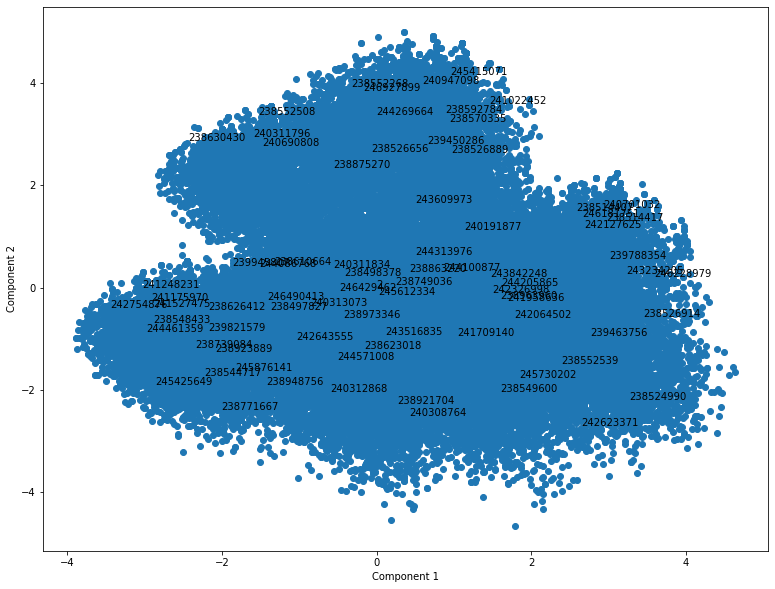

In [68]:
fig, ax = plt.subplots(figsize=(13,10))
ax.scatter(data_pca2['PC1'], data_pca2['PC2'])

ax.annotate(2,(0,0))

for i in np.arange(0,77):
    ax.annotate(df1.CMPLNT_NUM[i],(data_pca2.loc[i,'PC1']-0.1,data_pca2.loc[i,'PC2']+0.1))

plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.savefig('2D_plot.png', dpi=100,bbox_inches='tight')